In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D 

# Aufgabe 4

In [2]:
F_b = np.array([[0.97,-0.243],[0.243,0.97]])

np.linalg.svd(F_b)

(array([[-0.2430062 , -0.97002474],
        [ 0.97002474, -0.2430062 ]]),
 array([0.9999745, 0.9999745]),
 array([[ 0.,  1.],
        [-1., -0.]]))

In [3]:
F_d = np.array([[1,0],[0.5,1]])

W,s,Vh = np.linalg.svd(F_d)

P = Vh.T @ np.diag(s) @ Vh
U = W @ Vh
print(P)
print(U)

[[1.09141031 0.24253563]
 [0.24253563 0.9701425 ]]
[[ 0.9701425  -0.24253563]
 [ 0.24253563  0.9701425 ]]


In [4]:
F_e = np.array([[1,0.5],[0.5,1]])
W,s,Vh = np.linalg.svd(F_e)

print(Vh.T @ np.diag(s) @ Vh)
print(W @ Vh)

[[1.  0.5]
 [0.5 1. ]]
[[ 1.00000000e+00 -5.48888227e-17]
 [ 1.01465364e-17  1.00000000e+00]]


In [5]:
F_f = np.array([[1.3,-0.375],[0.75,0.65]])
W,s,Vh = np.linalg.svd(F_f)

print(Vh.T @ np.diag(s) @ Vh)
print(W @ Vh)

[[1.5008331  0.        ]
 [0.         0.75041655]]
[[ 0.86618559 -0.49972245]
 [ 0.49972245  0.86618559]]


# Aufgabe 5

In [6]:
def PD_svd(A):
    A = np.array(A)
    U,s, Vh = np.linalg.svd(A)
    return U @ Vh, Vh.T @ np.diag(s) @ Vh

def PD_iterative(A, it=10):
    U = np.array(A)
    for i in range(it):
        U = 0.5*(U + np.linalg.inv(U.T))
    return U, np.linalg.inv(U) @ A

In [7]:
def plot_square(matrices, labels):
    points = np.array([[0,1,1,0],[0,0,1,1]])

    fig, axs  = plt.subplots(1, len(matrices), figsize=(5*len(matrices), 5))
    if len(matrices) == 1:
        axs = [axs]
    for i in range(len(matrices)):
        points_transformed =  matrices[i] @ points
        axs[i].set_title(labels[i])
        axs[i].set_xlim(-1, 2)
        axs[i].set_ylim(-1, 2)
        for j in range(4):
            X = points_transformed[0,j], points_transformed[0,(j+1)%4]
            Y = points_transformed[1,j], points_transformed[1,(j+1)%4]
            line = Line2D(X, Y)
            axs[i].add_line(line)
    plt.show()

U:
[[ 0.936 -0.351]
 [ 0.351  0.936]]
P:
[[1.2   0.351]
 [0.351 0.936]]


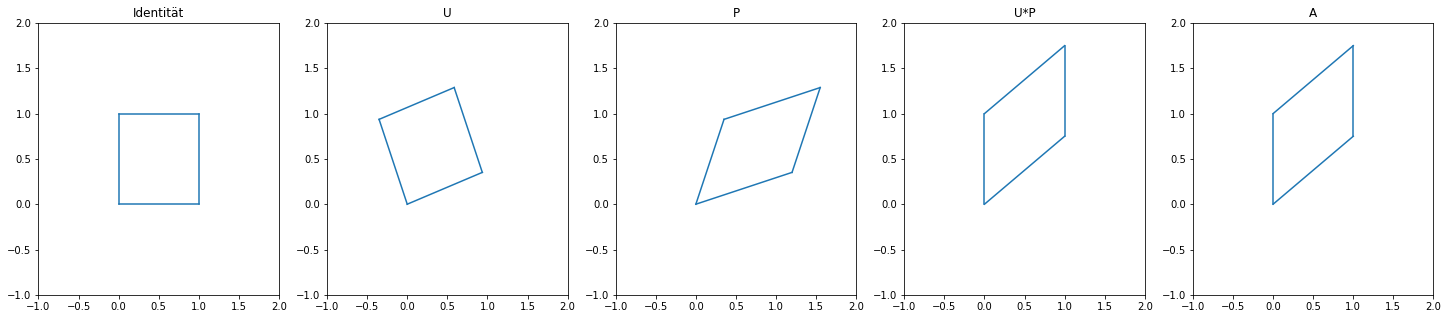

U:
[[ 1. -0.]
 [ 0.  1.]]
P:
[[1.   0.25]
 [0.25 1.  ]]


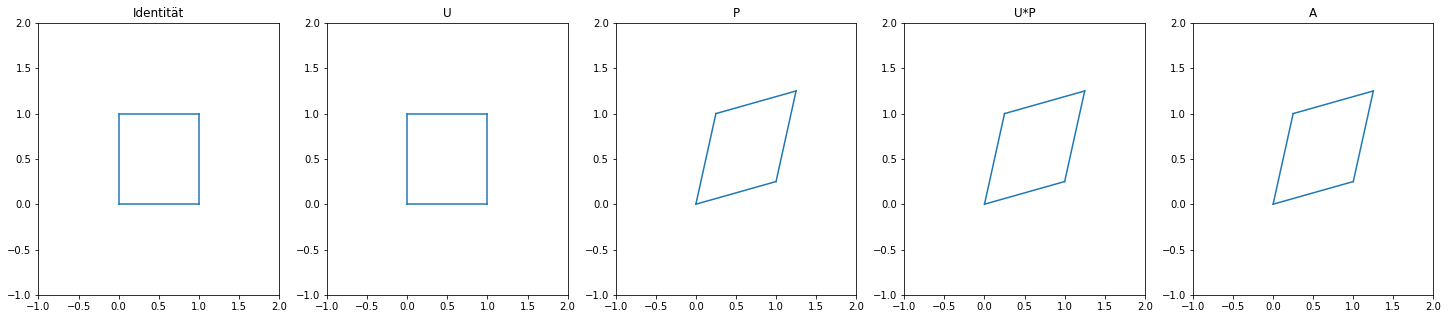

U:
[[ 0.744 -0.668]
 [ 0.668  0.744]]
P:
[[ 1.498e+00 -1.000e-03]
 [-1.000e-03  5.010e-01]]


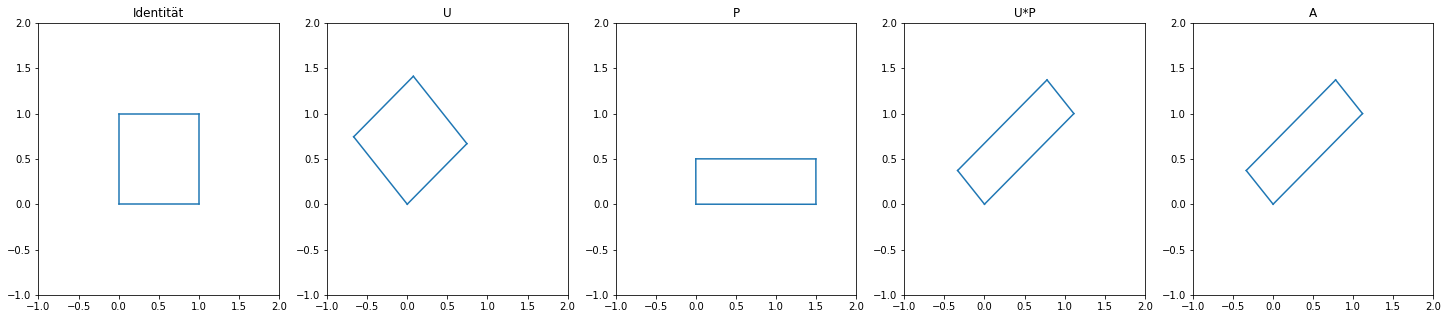

In [8]:
A1 = np.array([[1.0, 0.0],[0.75,1.0]])
A2 = np.array([[1.0,  0.25],[ 0.25, 1.0]])
A3 = np.array([[1.115, -0.335],[1.0, 0.372]])
I = np.eye(2)

for A in [A1, A2, A3]:
    U, P = PD_svd(A)
    print("U:")
    print(U.round(3))
    print ("P:")
    print(P.round(3))
    plot_square([I, U, P, U @ P, A], ["Identität", "U", "P", "U*P", "A"])

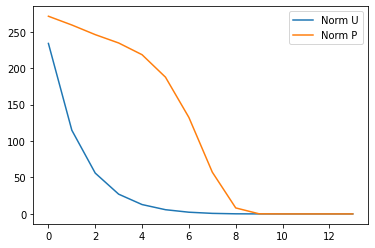

In [9]:
A = np.random.random((500,500))
U, P = PD_svd(A)
it = 15
norms_U = [ np.linalg.norm(PD_iterative(A,i)[0] - U) for i in range(1,it)]
norms_P = [ np.linalg.norm(PD_iterative(A,i)[1] - P) for i in range(1,it)]
plt.plot(norms_U)
plt.plot(norms_P)
plt.legend(["Norm U","Norm P"])
plt.show()

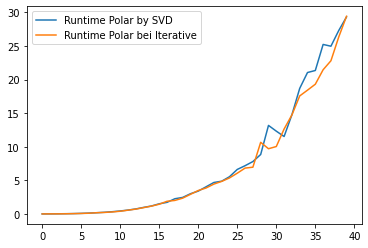

In [90]:
import timeit
max_dim = 4000
average_of = 1
runtimes_svd = []
runtimes_iterative = []

for i in range(0,max_dim,100):
    A = np.random.random((i,i))
    runtimes_svd.append(timeit.timeit("PD_svd(A)", setup = "from __main__ import PD_svd, A", number=average_of)/average_of)
    runtimes_iterative.append(timeit.timeit("PD_iterative(A)", setup = "from __main__ import PD_iterative, A", number=average_of)/average_of)

plt.plot(runtimes_svd)
plt.plot(runtimes_iterative)
plt.legend(["Runtime Polar by SVD", "Runtime Polar bei Iterative"])
plt.show()